# Lending Club Case Study

#### Introduction
The platform Lending Club, which links borrowers and investors looking to profit from personal loans, is the subject of the case study. The challenge for the business is deciding whether to approve or deny loan applications based on the profile of the applicant. Accepting a loan from a high-risk borrower who will probably default carries a higher risk of financial loss than accepting a loan from a potential borrower who would almost certainly repay.

#### Key Objective
Finding the driving forces, or driver variables, behind loan defaults, which are reliable predictors of future defaults, is the study's main goal. The business will be able to manage its portfolio and evaluate risk properly thanks to this insight.

#### Approach
The study uses a systematic strategy to determine the factors that affect loan default, which involves data interpretation, data validation and preparation, and data visualisation. The report offers suggestions for the business to better evaluate and manage risk in its loan portfolio based on these findings.

## Data Importing and Data Understanding

In [2]:
# Importing required libraries
import numpy as np              
import pandas as pd        
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the CSV File
ld = pd.read_csv("loan.csv")
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Information

In [4]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Columns in loan data
ld.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
ld.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
ld.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Validation and preparation

In [8]:
#Checking for null values
ld.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
ld.columns[ld.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [10]:
#Droping the columns with null values
ld.dropna(axis=1, how='all', inplace=True)

In [11]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
#Check rows with null values
ld.isnull().all(axis=0).sum()

0

In [13]:
#No rows with all null values, so finding the percentage
null_perc= round(100*(ld.isnull().sum()/len(ld.index)),2)
null_perc[null_perc>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [14]:
#Considering 30% as threshold, removing the columns with more than 30% null values
ld.drop(null_perc[null_perc>30].index, axis=1, inplace=True)

In [15]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
ld.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [17]:
#Checking for columns with unique values
ld.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [18]:
#Droping single values columns and irrelevant columns
ld.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status', 'member_id', 'url', 'title', 'emp_title', 'zip_code'], axis = 1, inplace = True)
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [19]:
ld.shape

(39717, 39)

In [20]:
#Checking loan status column
print(ld.loan_status.value_counts())

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [21]:
#Excluding loan_status = 'Current'.These candidates are not labelled as 'defaulted'.
ld=ld[ld.loan_status!='Current']
ld.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [22]:
#Checking purpose for loan
print(ld.purpose.value_counts())

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64


In [23]:
#Percentage calculation of purpose for loan
(ld.purpose.value_counts()*100)/len(ld)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [24]:
#Check numeric field
print(ld.isnull().sum().sort_values(ascending=False))

emp_length                 1033
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
last_credit_pull_d            2
total_pymnt                   0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_rec_prncp               0
total_pymnt_inv               0
inq_last_6mths                0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
open_acc                      0
id                            0
loan_amnt                     0
delinq_2yrs                   0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_i

In [25]:
#checking emp_length
print(ld['emp_length'].unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [26]:
ld.emp_length.fillna('< 1 year', inplace=True)

In [27]:
#checking pub_rec_bankruptcies
ld['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [28]:
ld.pub_rec_bankruptcies.isnull().sum()

697

In [29]:
ld.pub_rec_bankruptcies.fillna('Unknown',inplace=True)

In [30]:
#Checking revol_util
ld['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [31]:
ld.revol_util.fillna('0.00%', inplace=True)

In [32]:
ld.revol_util.isnull().sum()

0

### Adding derived columns

In [33]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

In [34]:
#Correcting the data types and adding columns
ld['pub_rec_bankruptcies_derv']=ld.pub_rec_bankruptcies
ld['pub_rec_bankruptcies_derv'].replace('Unknown', '0.0',inplace=True)
ld.pub_rec_bankruptcies_derv=ld.pub_rec_bankruptcies_derv.apply(pd.to_numeric)

In [35]:
ld['int_rate_derv']=ld.int_rate.str.rstrip('%')
ld.int_rate_derv=ld.int_rate_derv.apply(pd.to_numeric)

In [36]:
ld['emp_length_derv']=ld.emp_length.str.extract('(\d+)')
ld.emp_length_derv=ld.emp_length_derv.apply(pd.to_numeric)

In [37]:
ld['issue_d']=pd.to_datetime(ld.issue_d.str.upper(), format='%b-%y', yearfirst=False)
ld['issue_d_yr']=ld.issue_d.dt.year
ld['issue_d_mth']=ld.issue_d.dt.strftime('%b')

In [38]:
ld['earliest_cr_line']=pd.to_datetime(ld.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
ld['earliest_cr_line_yr']=ld.earliest_cr_line.dt.year
ld['earliest_cr_line_mth']=ld.earliest_cr_line.dt.strftime('%b')

In [39]:
ld['loan_status_derv']=ld['loan_status']
ld['loan_status_derv'].replace(['Fully Paid', 'Charged Off'],[0,1], inplace=True)
ld['loan_status_derv']=ld['loan_status_derv'].astype(int)

In [40]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  object        
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  object        
 11  annual_inc                 38577 non-null  float64       
 12  veri

In [41]:
#Defining category columns to category data type
ld.loan_status=ld.loan_status.astype('category')
ld.purpose=ld.purpose.astype('category')
ld.addr_state=ld.addr_state.astype('category')
ld.home_ownership=ld.home_ownership.astype('category')
ld.verification_status=ld.verification_status.astype('category')
ld.grade=ld.grade.astype('category')

In [42]:
#Creating Annual Income categorical data
cut_bins = [0, 5000, 10000, 20000, 30000, 50000, 75000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000]
cut_lables = ['0 - 5000', '5000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '50000 - 75000', '75000 - 100000', '100000 - 200000', '200000 - 300000', '300000 - 500000', '500000 - 800000', '800000 - 1000000', '1000000 - 1500000', ' > 1500000']
ld['annual_inc_dive'] = pd.cut(x=ld['annual_inc'], bins = cut_bins, labels = cut_lables)

In [43]:
#Creating Interest Rate categorical data
ld['int_rate_derv2'] = pd.cut(ld['int_rate_derv'], bins=5, precision=0, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [44]:
#Creating Loan Amount categorical data
ld['funded_amnt_inv_dive'] = pd.cut(ld['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
ld['funded_amnt_dive'] = pd.cut(ld['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
ld['loan_amnt_dive'] = pd.cut(ld['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [45]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  category      
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  category      
 11  annual_inc                 38577 non-null  float64       
 12  veri

In [46]:
ld.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'pub_rec_bankruptcies_derv', 'int_rate_derv',
       'emp_length_derv', 'issue_d_yr', 'issue_d_mth', 'earliest_cr_line_yr',
       'earliest_cr_line_mth', 'loan_status_derv', 'annual_inc_dive',
       'int_rate_derv2', 'funded_amnt_inv_dive', 'funded_amnt_dive',
       'loan_amnt_dive'],
      dtype='object')

<AxesSubplot:xlabel='loan_amnt'>

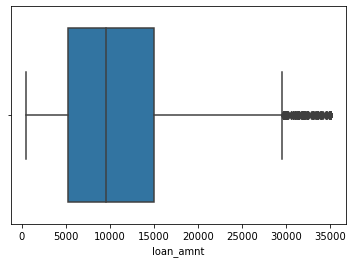

In [47]:
#Outliers for loan_amnt column
sns.boxplot(ld['loan_amnt'])

In [48]:
# Checking percentiles for loan_amnt
ld.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

**Observation** 
- Data is continous, hence taking no action

In [49]:
#Creating Dataframe for Charged Off loans only
Charged_off_df=ld[ld.loan_status=='Charged Off']
Charged_off_df.shape

(5627, 52)

## Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

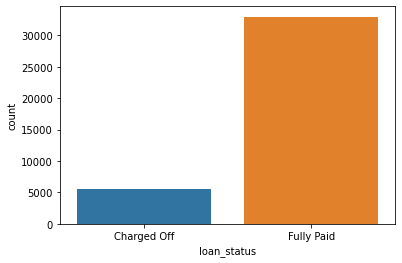

In [50]:
#Loan status
sns.countplot(ld.loan_status)

**Observation** 
- Fully Paid loans are high when compared to Charged Off loans

In [51]:
#Loan status by Loan grade
ld['loan_status'] = ld['loan_status'].apply(lambda x: 'Default' if x=='Charged Off' else 'Not Default')

In [52]:
ctab = pd.crosstab(ld['grade'], ld['loan_status'], normalize='index')

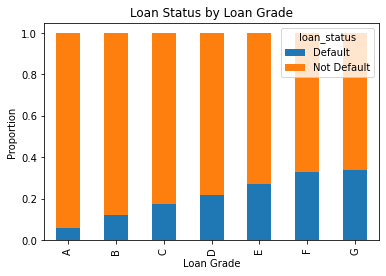

In [53]:
ctab.plot(kind='bar', stacked=True)
plt.xlabel('Loan Grade')
plt.ylabel('Proportion')
plt.title('Loan Status by Loan Grade')
plt.show()

**Observation**
- Loan status indicates loan outcome and default risk, essential for identifying patterns, building models, and assessing portfolio performance. This chart shows the proportion of loans in each grade that are either defaulted or not defaulted and helps us understand how loan grade and loan status are related.Loans with lower grades have higher default rates, and loans with higher grades are more likely to be fully paid off.

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

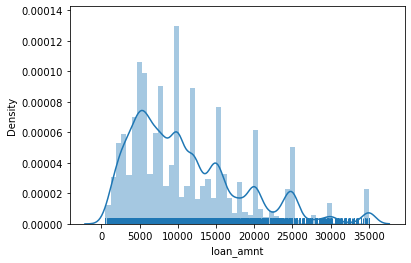

In [54]:
#Loan Amount analysis
sns.distplot(a=ld.loan_amnt, rug=True)

<AxesSubplot:xlabel='loan_amnt_dive', ylabel='count'>

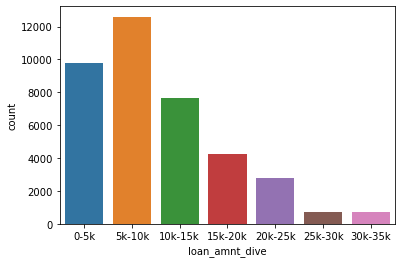

In [55]:
sns.countplot(x='loan_amnt_dive', data=ld)

Text(0.5, 1.0, 'Charged Off Loan Amount Analysis')

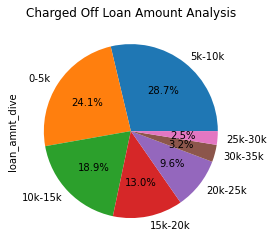

In [56]:
Charged_off_df['loan_amnt_dive'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Charged Off Loan Amount Analysis')

In [57]:
ld.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Observation** 
- Loan amount varies between 500-35k, with average of 9600
- Majority of loan is provide for amount between 5k-10k
- Charged off loan count is higher for loan amount between 5k-10k

Text(0.5, 1.0, 'Overall Interest Analysis')

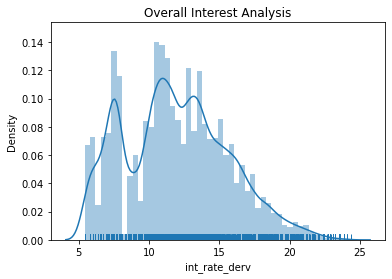

In [58]:
#int_rate Analysis
sns.distplot(a=ld.int_rate_derv, rug=True)
plt.title('Overall Interest Analysis')

Text(0.5, 1.0, 'Charged Off - Interest Rate Analysis')

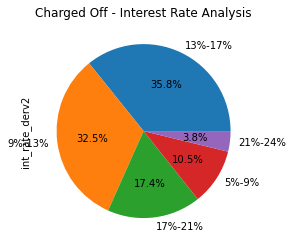

In [88]:
Charged_off_df['int_rate_derv2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Charged Off - Interest Rate Analysis')

**Observation**
- Overall Loan Data indicates the interest rate peaking at 10%
- Around 50% of Charged Off Loans are in 13% - 21% interest rate range.

<AxesSubplot:xlabel='count', ylabel='purpose'>

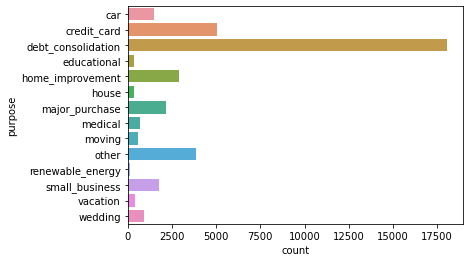

In [60]:
#Purpose of loan analysis
sns.countplot(y=ld.purpose)

<AxesSubplot:xlabel='count', ylabel='purpose'>

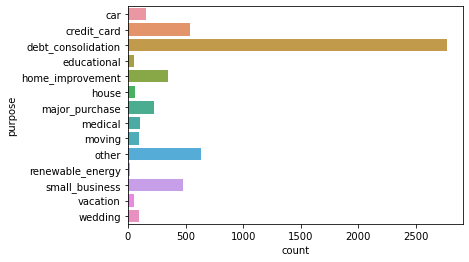

In [61]:
#Charged off loans
sns.countplot(y=Charged_off_df.purpose)

**Observation**
- Loans taken for Debt Consolidation purpose are major defaulters, followed for Credit Card & Other purpose. This is similar for Charged Off Loans too.

In [62]:
#Loan grade by purpose
ctab = pd.crosstab(ld['purpose'], ld['grade'], normalize='index')

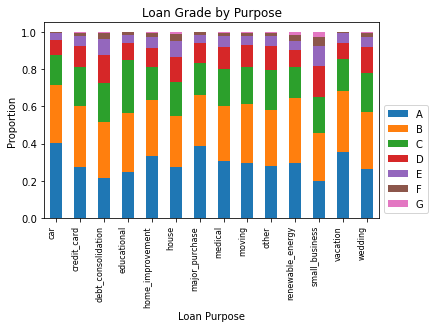

In [85]:
ax = ctab.plot(kind='bar', stacked=True)
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Proportion')
ax.set_title('Loan Grade by Purpose')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.subplots_adjust(bottom=0.2)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0), ncol=1)
plt.show()

**The stacked bar chart shows the proportion of loans in each loan grade for each loan purpose, which helps us understand how loan purpose and loan grade are related. We can draw several conclusions from this chart:**
- Debt consolidation is the most common loan purpose across all loan grades, while educational loans are the least common.
- The proportion of loans for debt consolidation is highest in the A and B loan grades, while the proportion of loans for small   business and renewable energy is highest in the C and D loan grades.
- The proportion of loans for credit card refinancing is highest in the E and F loan grades, while the proportion of loans for     home improvement is highest in the G loan grade.
- The highest proportion of defaulted loans is in the D and E loan grades, with the highest default rates for small business and   renewable energy loans.

**Based on these observations, we can make several recommendations to manage credit risk and reduce default rates:**
- Lending companies should carefully assess the creditworthiness of borrowers before approving loans, particularly for higher-     risk loan purposes such as small business and renewable energy.
- Companies can adjust their lending policies and interest rates based on the risk associated with different loan purposes and     grades to better manage credit risk and reduce default rates.
- Lending companies should also monitor loan purpose data over time to identify trends and changes in customer demand and adjust   their offerings accordingly.

## Segmented Univariate Analysis

In [64]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  category      
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  category      
 11  annual_inc                 38577 non-null  float64       
 12  veri

<AxesSubplot:xlabel='count', ylabel='term'>

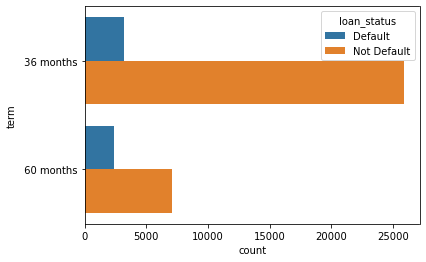

In [65]:
# Loan term vs Loan status
sns.countplot(data=ld,y='term', hue='loan_status')

**Observation**
- 60 months terms has higher number of defaulters

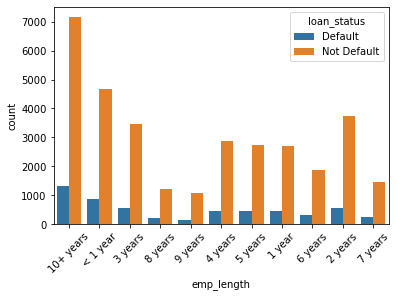

In [66]:
#Employment length vs loan status
sns.countplot(data=ld, x='emp_length', hue='loan_status')
plt.xticks(rotation=45)
plt.show()

**Observation**
- Employies with 10+ years of exp are mostly defaulters

## Bivariate Analysis

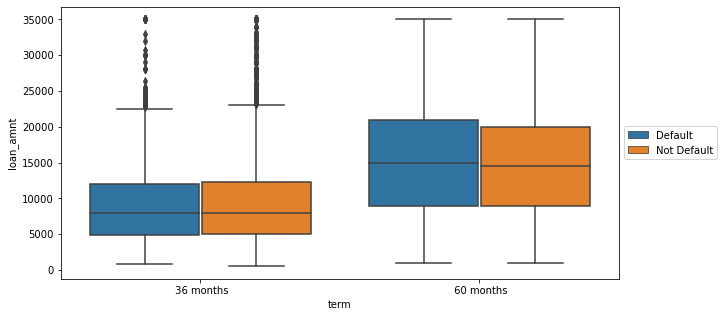

In [81]:
#Loan amount and loan term vs Loan status
plt.figure(figsize=(10,5))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=ld)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Observation**
- Most of the loans are approved for 60 month term
- Loan defaulter are higher for 60 moth term

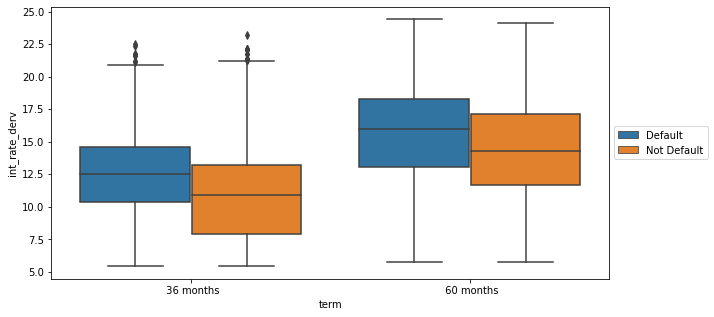

In [82]:
#term vs interest rate vs Loan status
plt.figure(figsize=(10,5))
sns.boxplot(x='term', y='int_rate_derv', hue='loan_status', data=ld)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

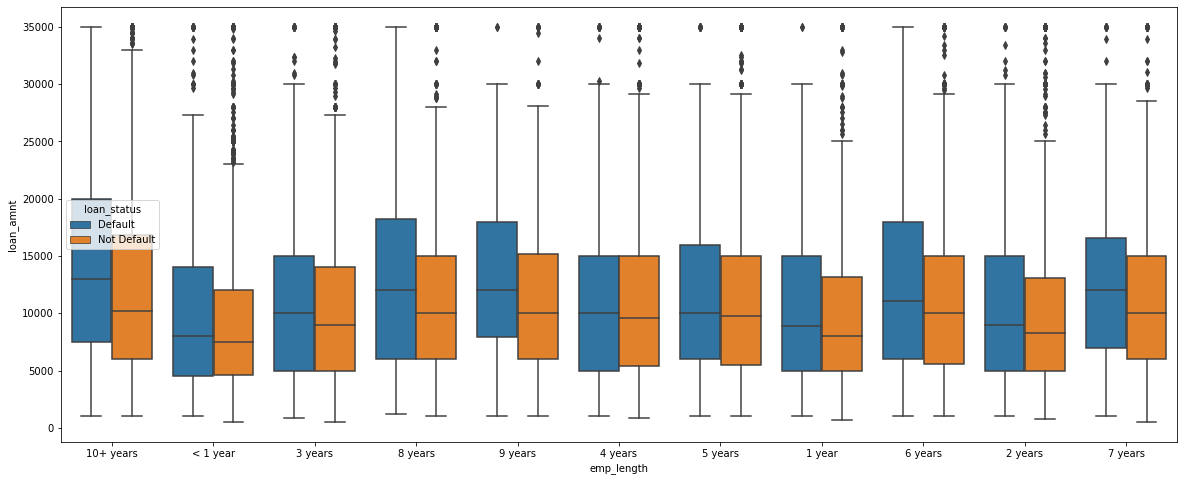

In [69]:
#employment length vs loan amount vs loan status
plt.figure(figsize=(20,8))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=ld)
plt.show()

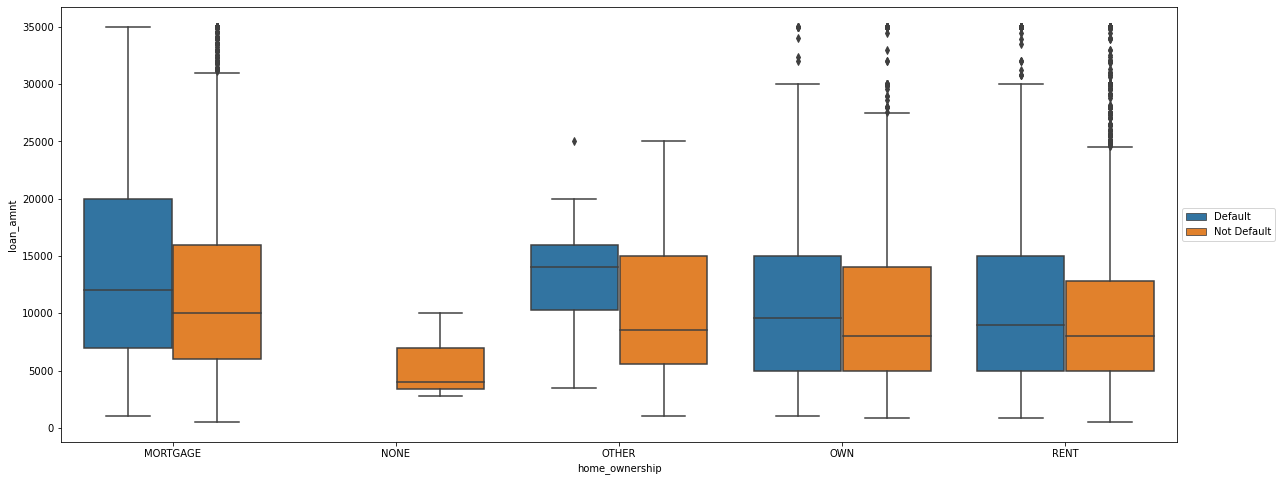

In [83]:
#Home ownership vs loan amount vs loan status
plt.figure(figsize=(20,8))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=ld)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Observation**
- Loan applicants with mortgage have high loan amount
- Loan applicants with mortgage have high defaulters

## Correlation Analysis

In [71]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  category      
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  category      
 11  annual_inc                 38577 non-null  float64       
 12  veri

<AxesSubplot:>

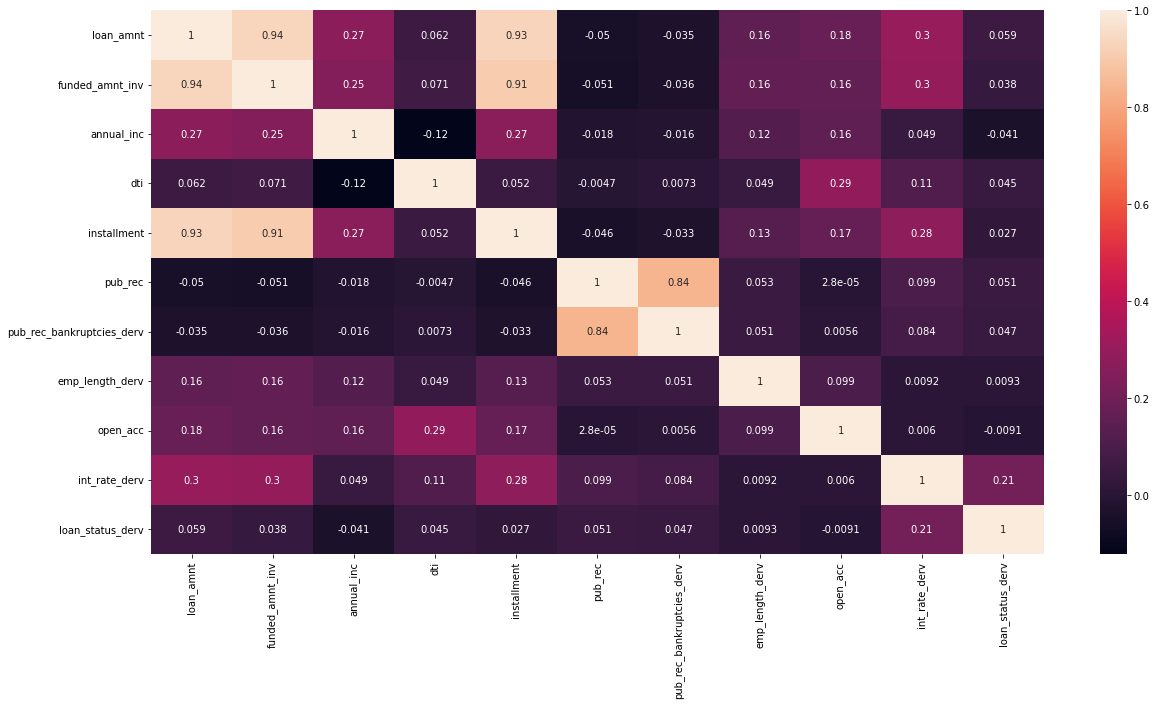

In [72]:
plt.figure(figsize=(20,10))
corr_df = ld[['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec','pub_rec_bankruptcies_derv', 'emp_length_derv','open_acc','int_rate_derv', 'loan_status_derv']]
sns.heatmap(corr_df.corr(), annot=True)

**Observation**
- Highest positive correlation between loan_amnt, funded_amnt_inv and installment
- Negative correlation is betwee annual_inc and dti

## Observation Summary:

#### Univariate Analysis
- More than 70% of the loans are sanctioned for the term of 60 Months
- Loan Amount varies from 500 to 35K and approx.. 80% of the loans are sanctioned for loan amount in range of 500 – 15K
- 73% of loans defaulted are in the loan amount range of 500 – 15K.
- Around 50% of Charged Off Loans are in 13% - 21% interest rate range.
- Loans taken for Debt Consolidation purpose are major defaulters, followed for Credit Card & Other purpose. This is similar for Charged Off Loans too.

#### Segmented Univariate Analysis
- 60 months terms has higher number of defaulters
- Applicants with employement length of 10+ years are mostly defaulters

#### Bivariate Analysis
- Interest Rate for Charged Off Loans is higher than the Fully Paid loans for both 36 months and 60 months term. Indicates that loans with higher interest rate are more likely to be defaulted.
- Loan applicants with mortgage have high loan amount
- Loan applicants with mortgage have high defaulters

#### Correlation Analysis
The heatmap shows the correlation between various loan factors such as loan amount, annual income, interest rate, and loan status. It suggests that loan amount, installment, and annual income have a positive correlation, while interest rate and DTI have a negative correlation with loan status. This can help in identifying factors that affect loan approval and in making lending decisions.

#### Recommendations
##### The Probability of defaulting is high when:
- Loan Applicants not owing home (Mortgage or Rent) and have high Annual Income Range (60K - 70K)
- Loans with interest rates between 9% - 17%
- Applicants with Annual Income range between 35k - 70k and availing loan for Debt Consolidation.
- Loan Applicants with >10 years of experience and with loan amount > 10K or with interest rate (>10%)

##### Indecators for loan defaulters
- Annual Income, Home Ownership, Purpose of Loan, Loan Amount, Interest Rate